<a href="https://colab.research.google.com/github/rohit19269/Risk-Analytics-In-Banking-Financial-Services/blob/main/Risk_Analytics_In_Banking_%26_Financial_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from scipy.special import *
from sklearn.preprocessing import *
from sklearn.decomposition import PCA

In [ ]:
import seaborn as sns

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [ ]:
path="/content/drive/MyDrive/ML Assignments/ML Project/"

# Reading data from dataset

In [ ]:
data = pd.read_csv(path+'Dataset/data.csv')
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#Data Visualisation

Columns descriptions

In [ ]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
data['AMT_INCOME_TOTAL'].median(), data.shape

(147150.0, (307511, 122))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


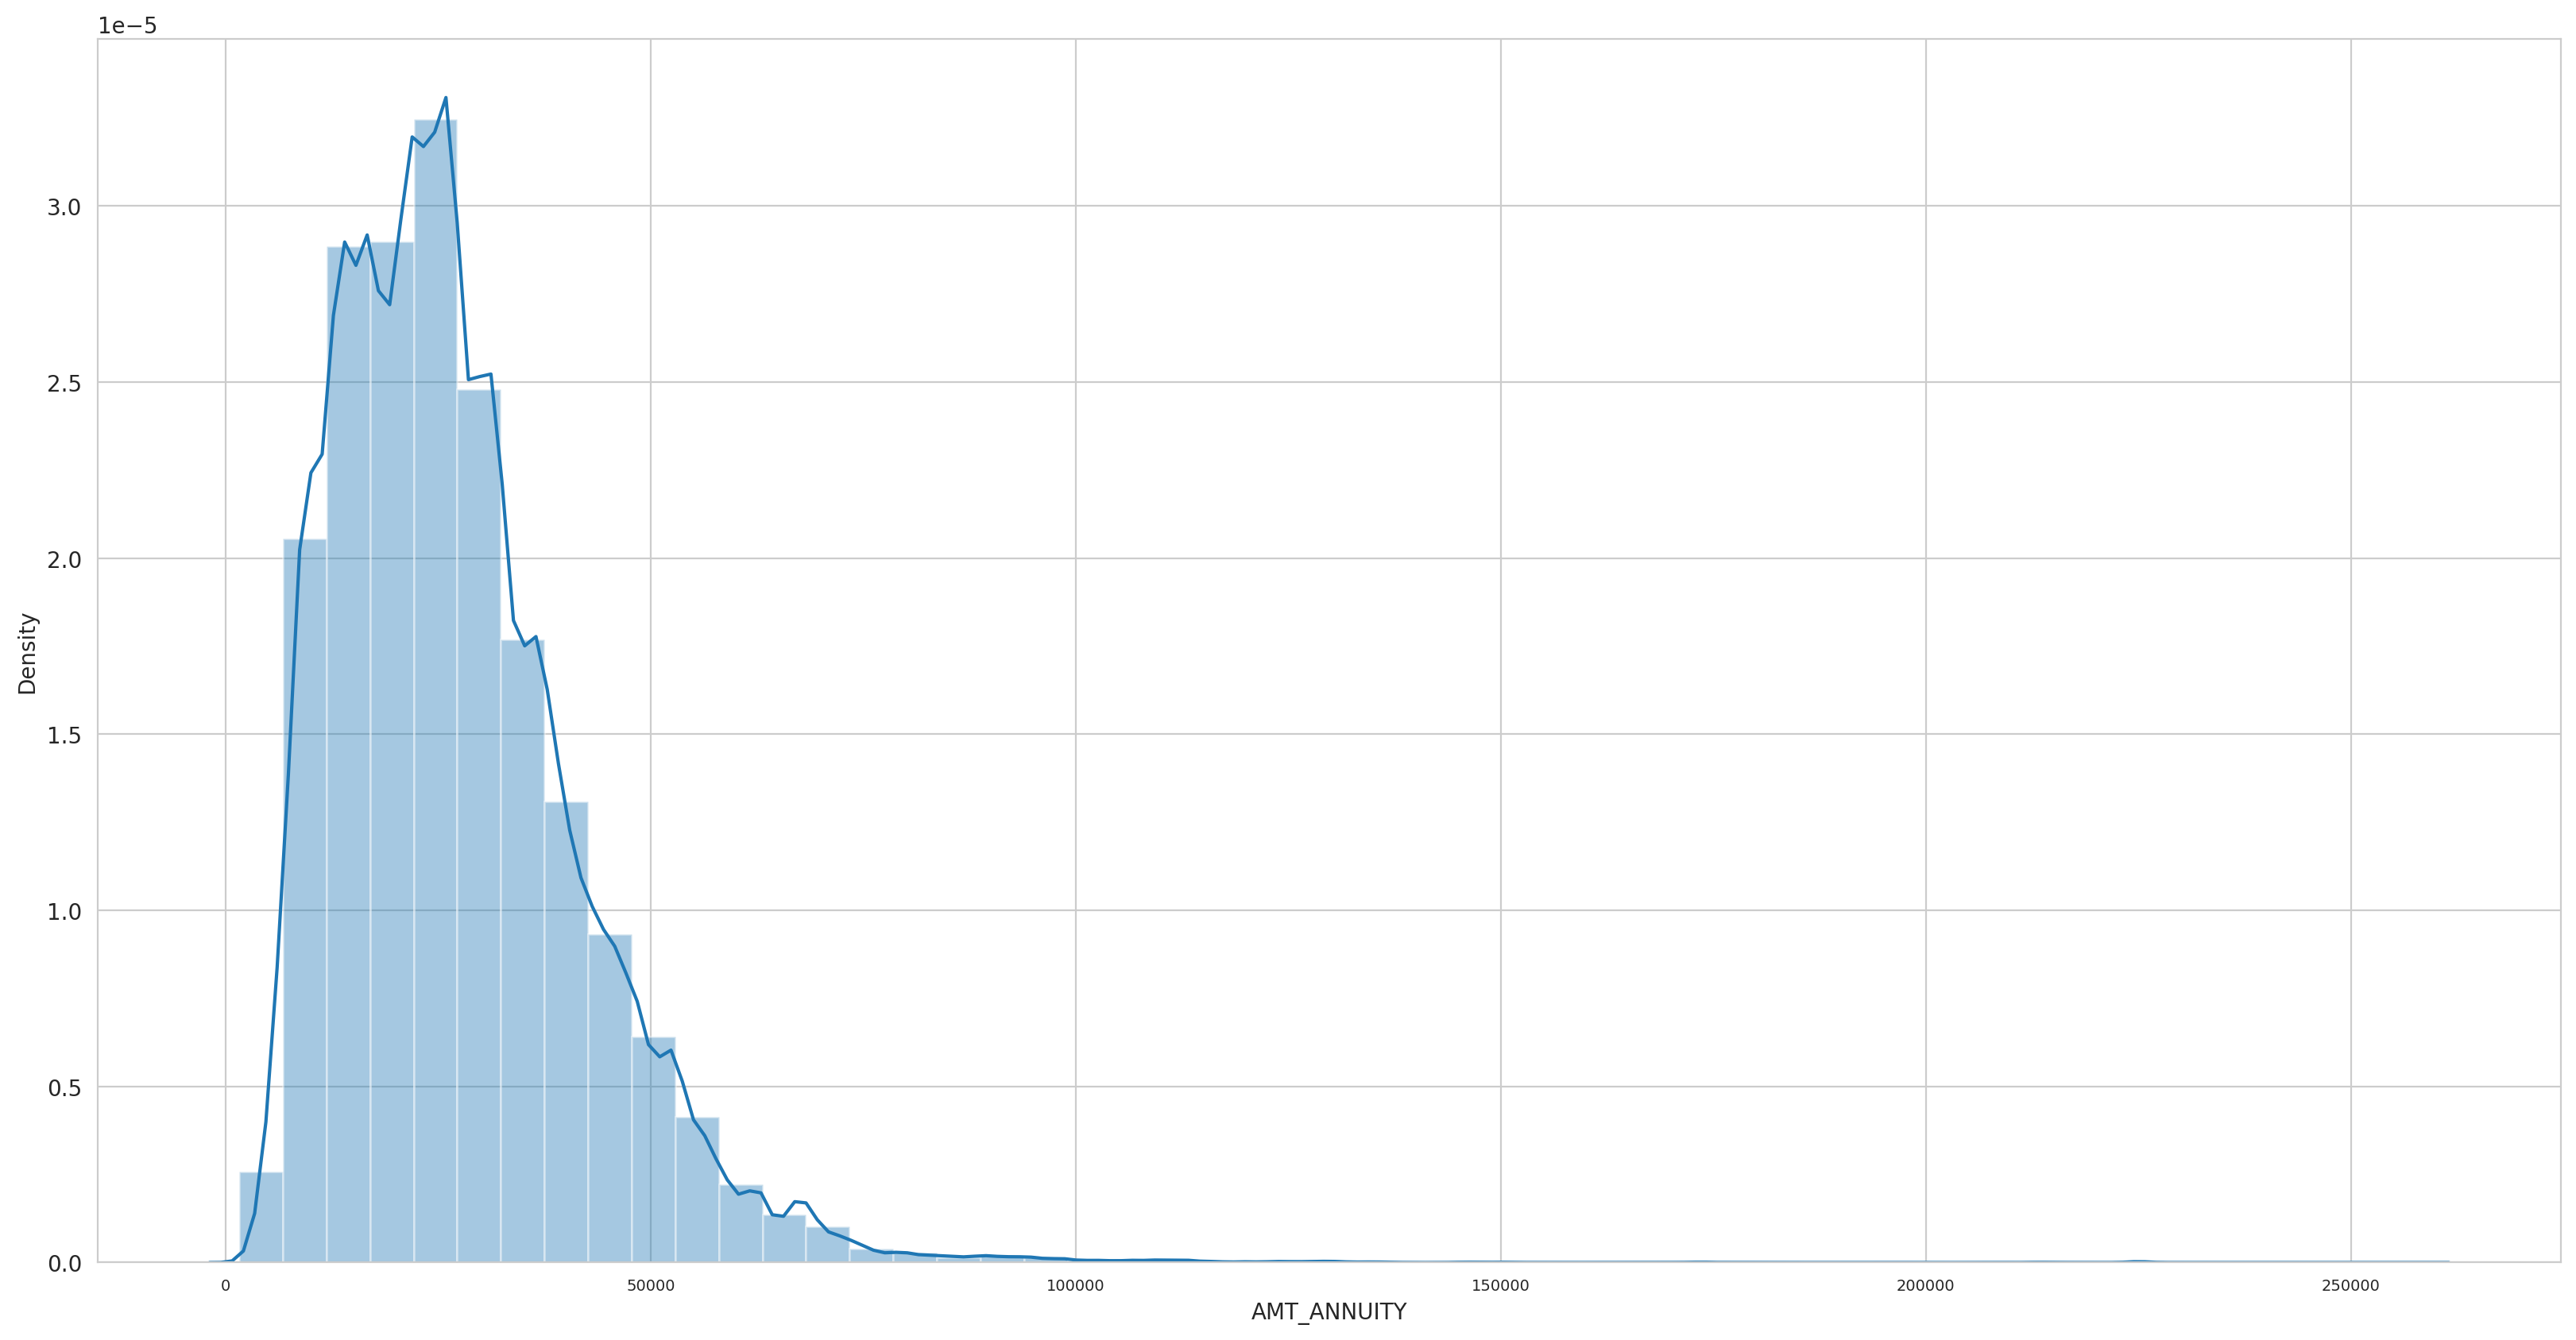

In [ ]:
sns.set_style('whitegrid') 
sns.distplot(data['AMT_ANNUITY']) 
plt.savefig(path+'Plots/densityVSamtnuity.png')
plt.show()

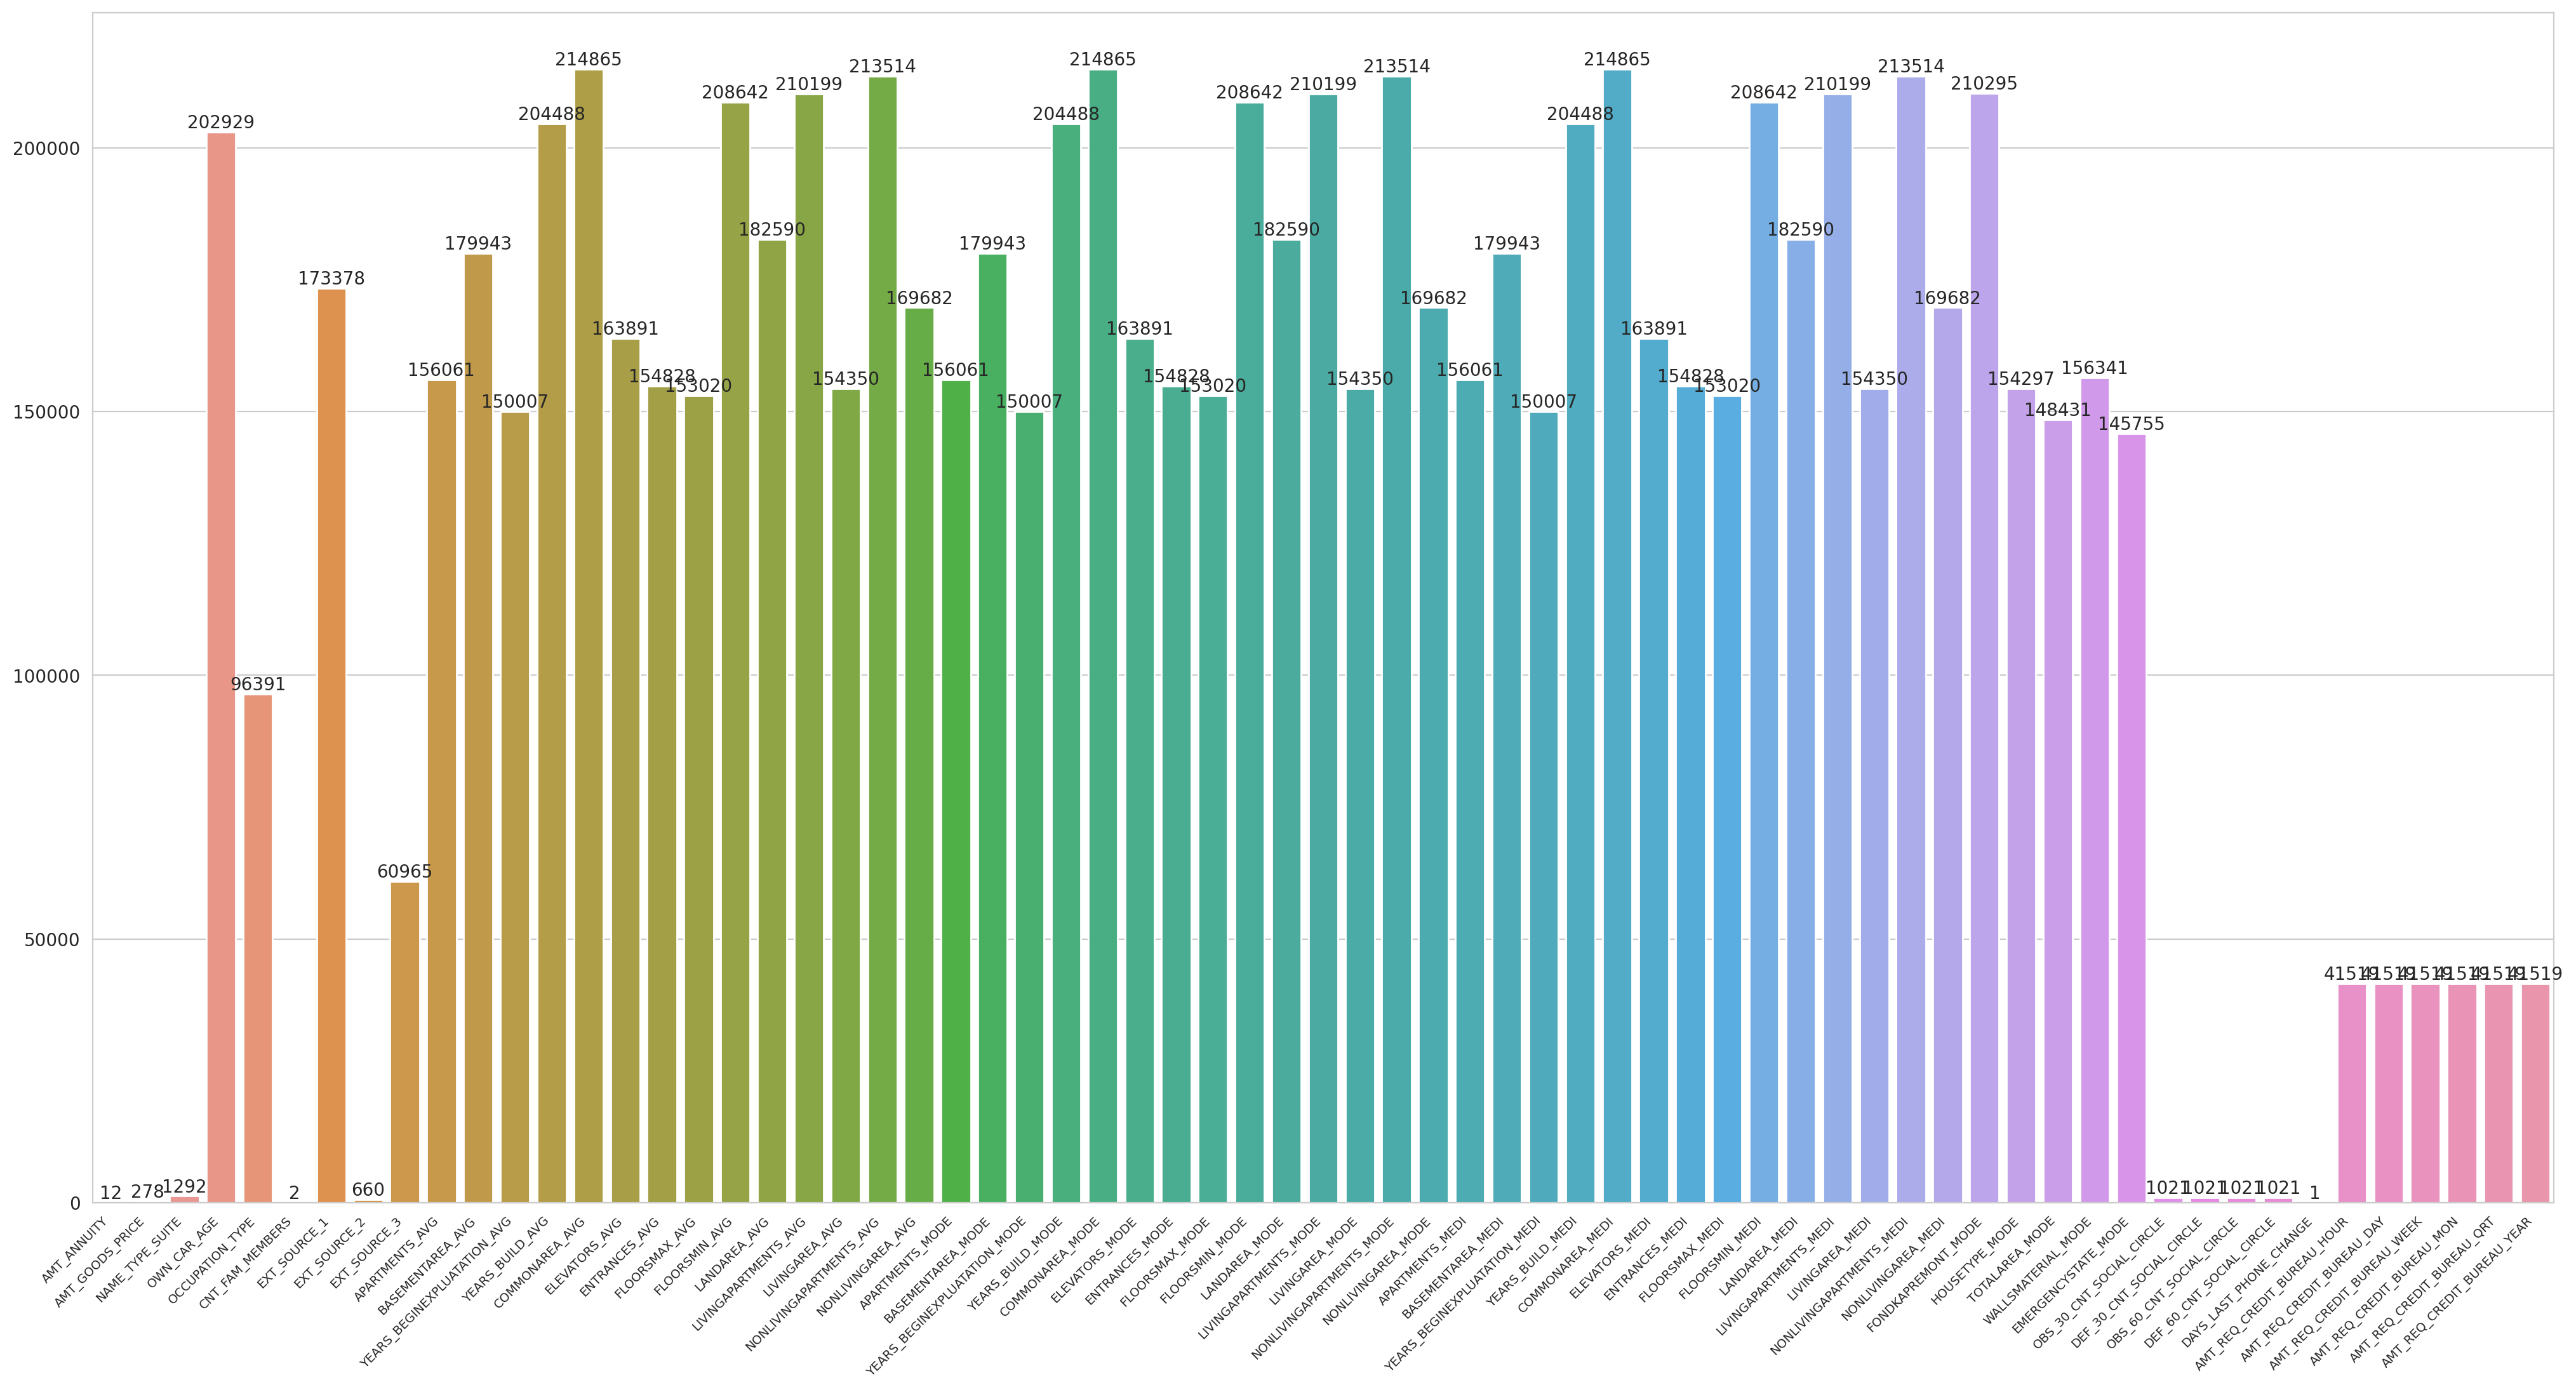

In [ ]:
nanCount,colArr = [],[]
for col in list(data.columns)[2:]:
    if sum(data[col].isna()) > 0:
        nanCount.append(sum(data[col].isna()))
        colArr.append(col)
# fig = plt.figure(figsize=(20, 8))
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
ax = sns.barplot(x=colArr,y=nanCount)
ax.bar_label(ax.containers[0])
plt.savefig(path+'Plots/columnsVsNanCouunt.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


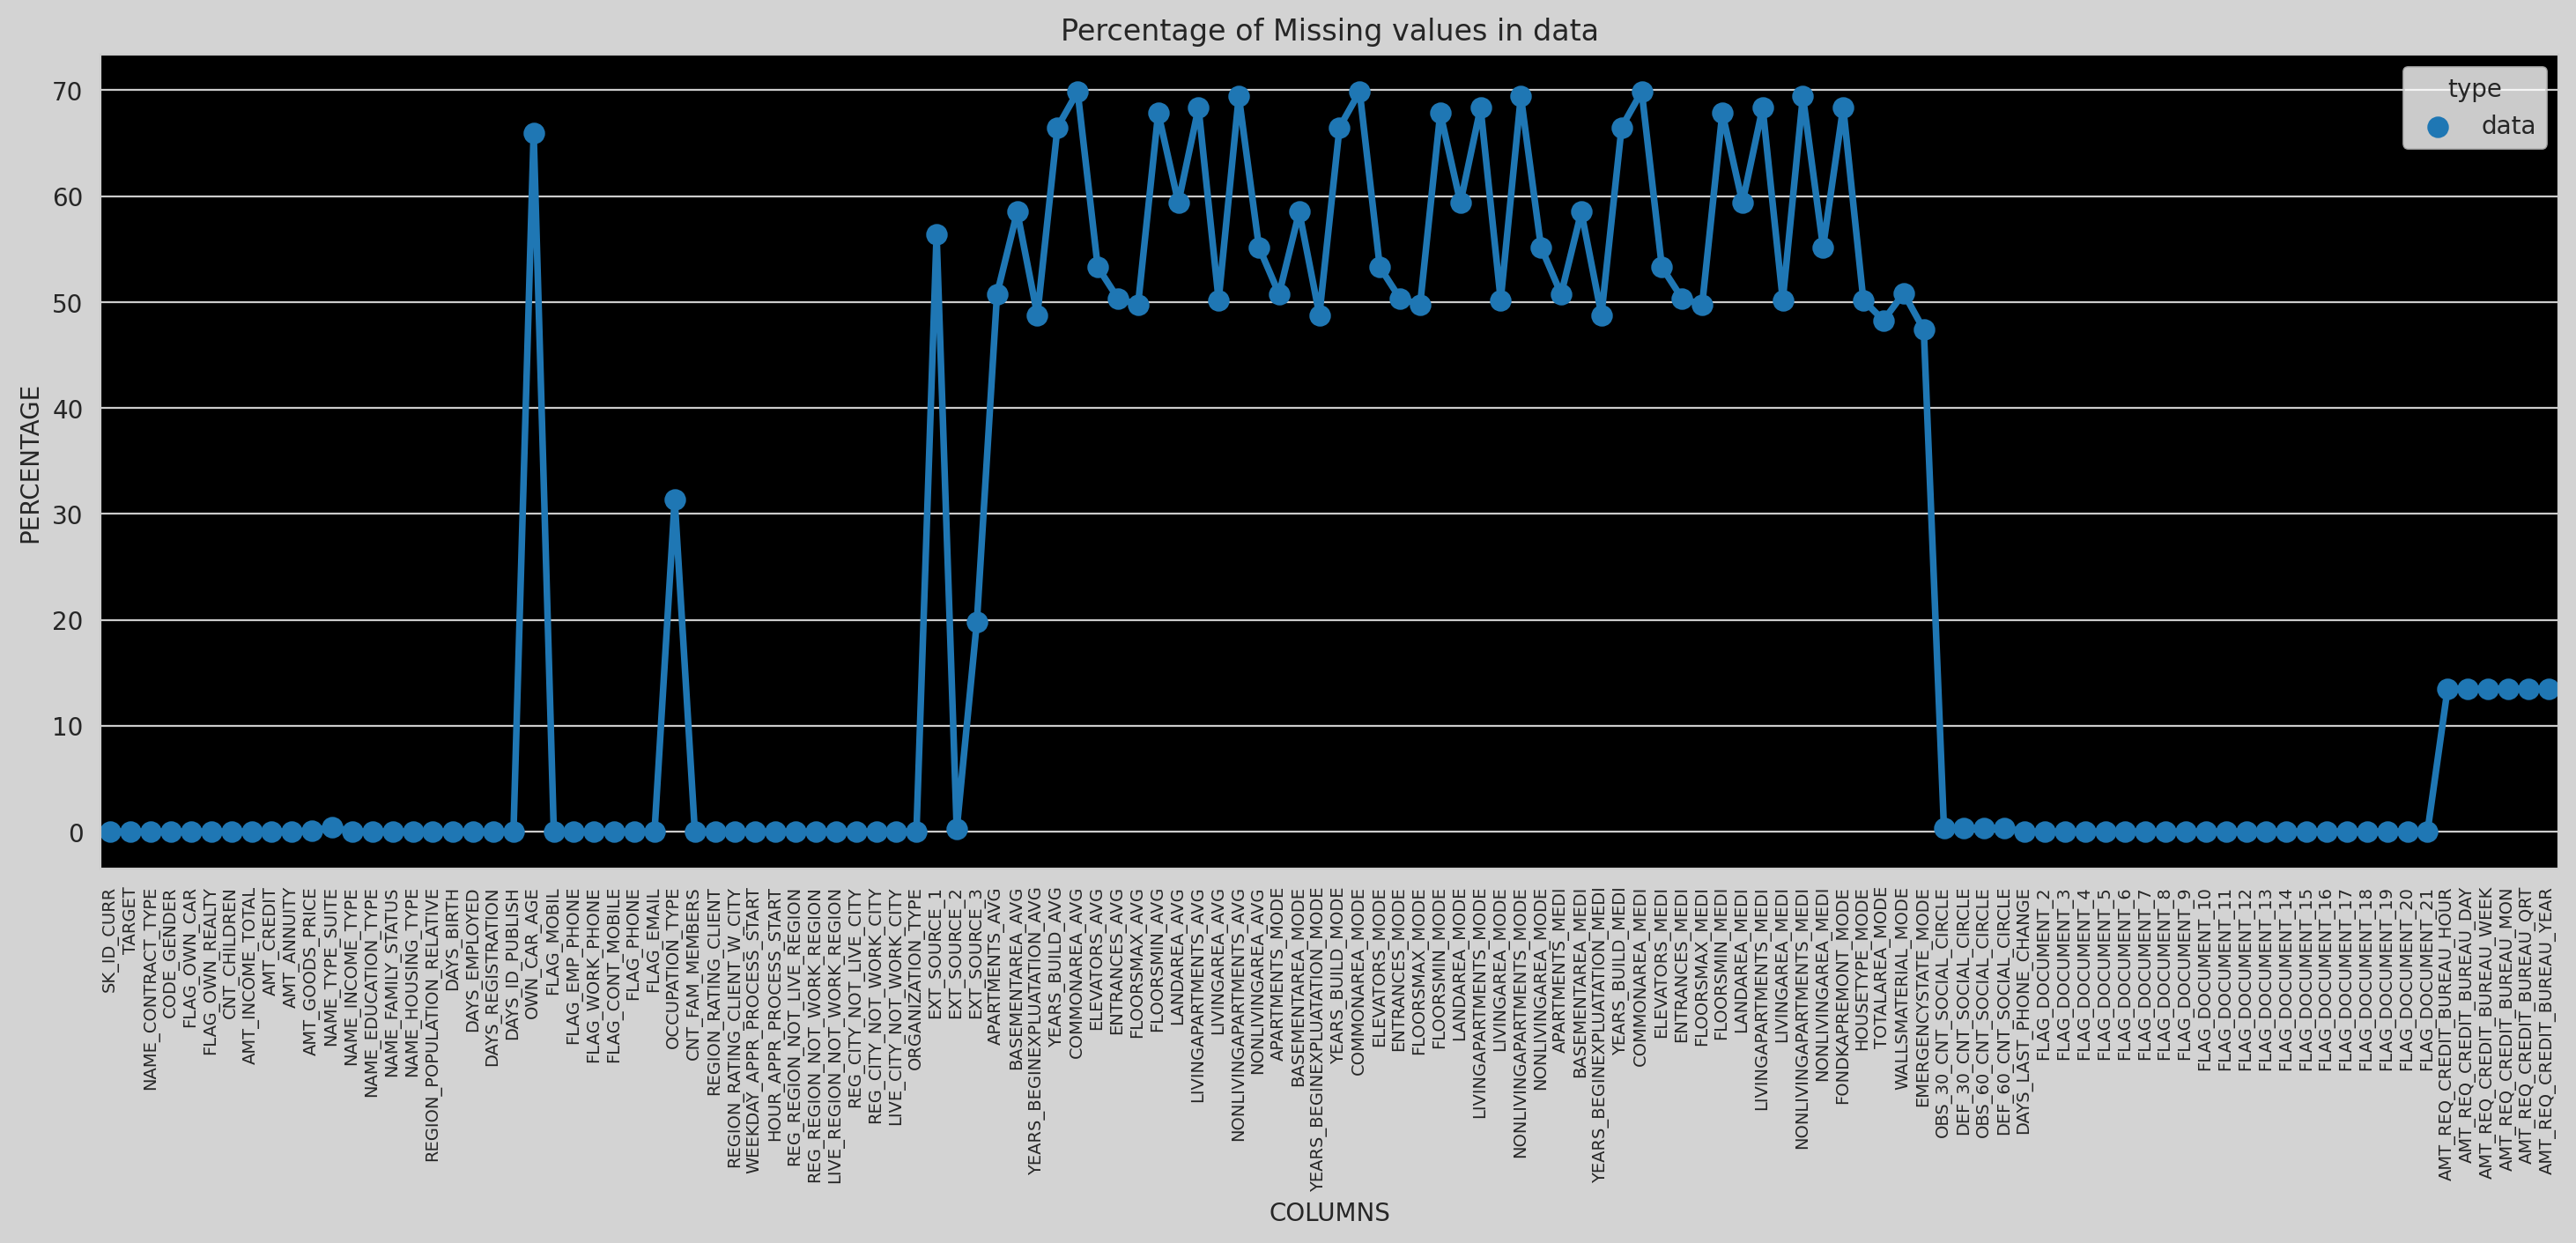

In [ ]:
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
miss_data["type"] = "data"
ax = sns.pointplot("index",0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.savefig(path+'Plots/columnsVsNanCouuntPercentage.png')

Heat Map

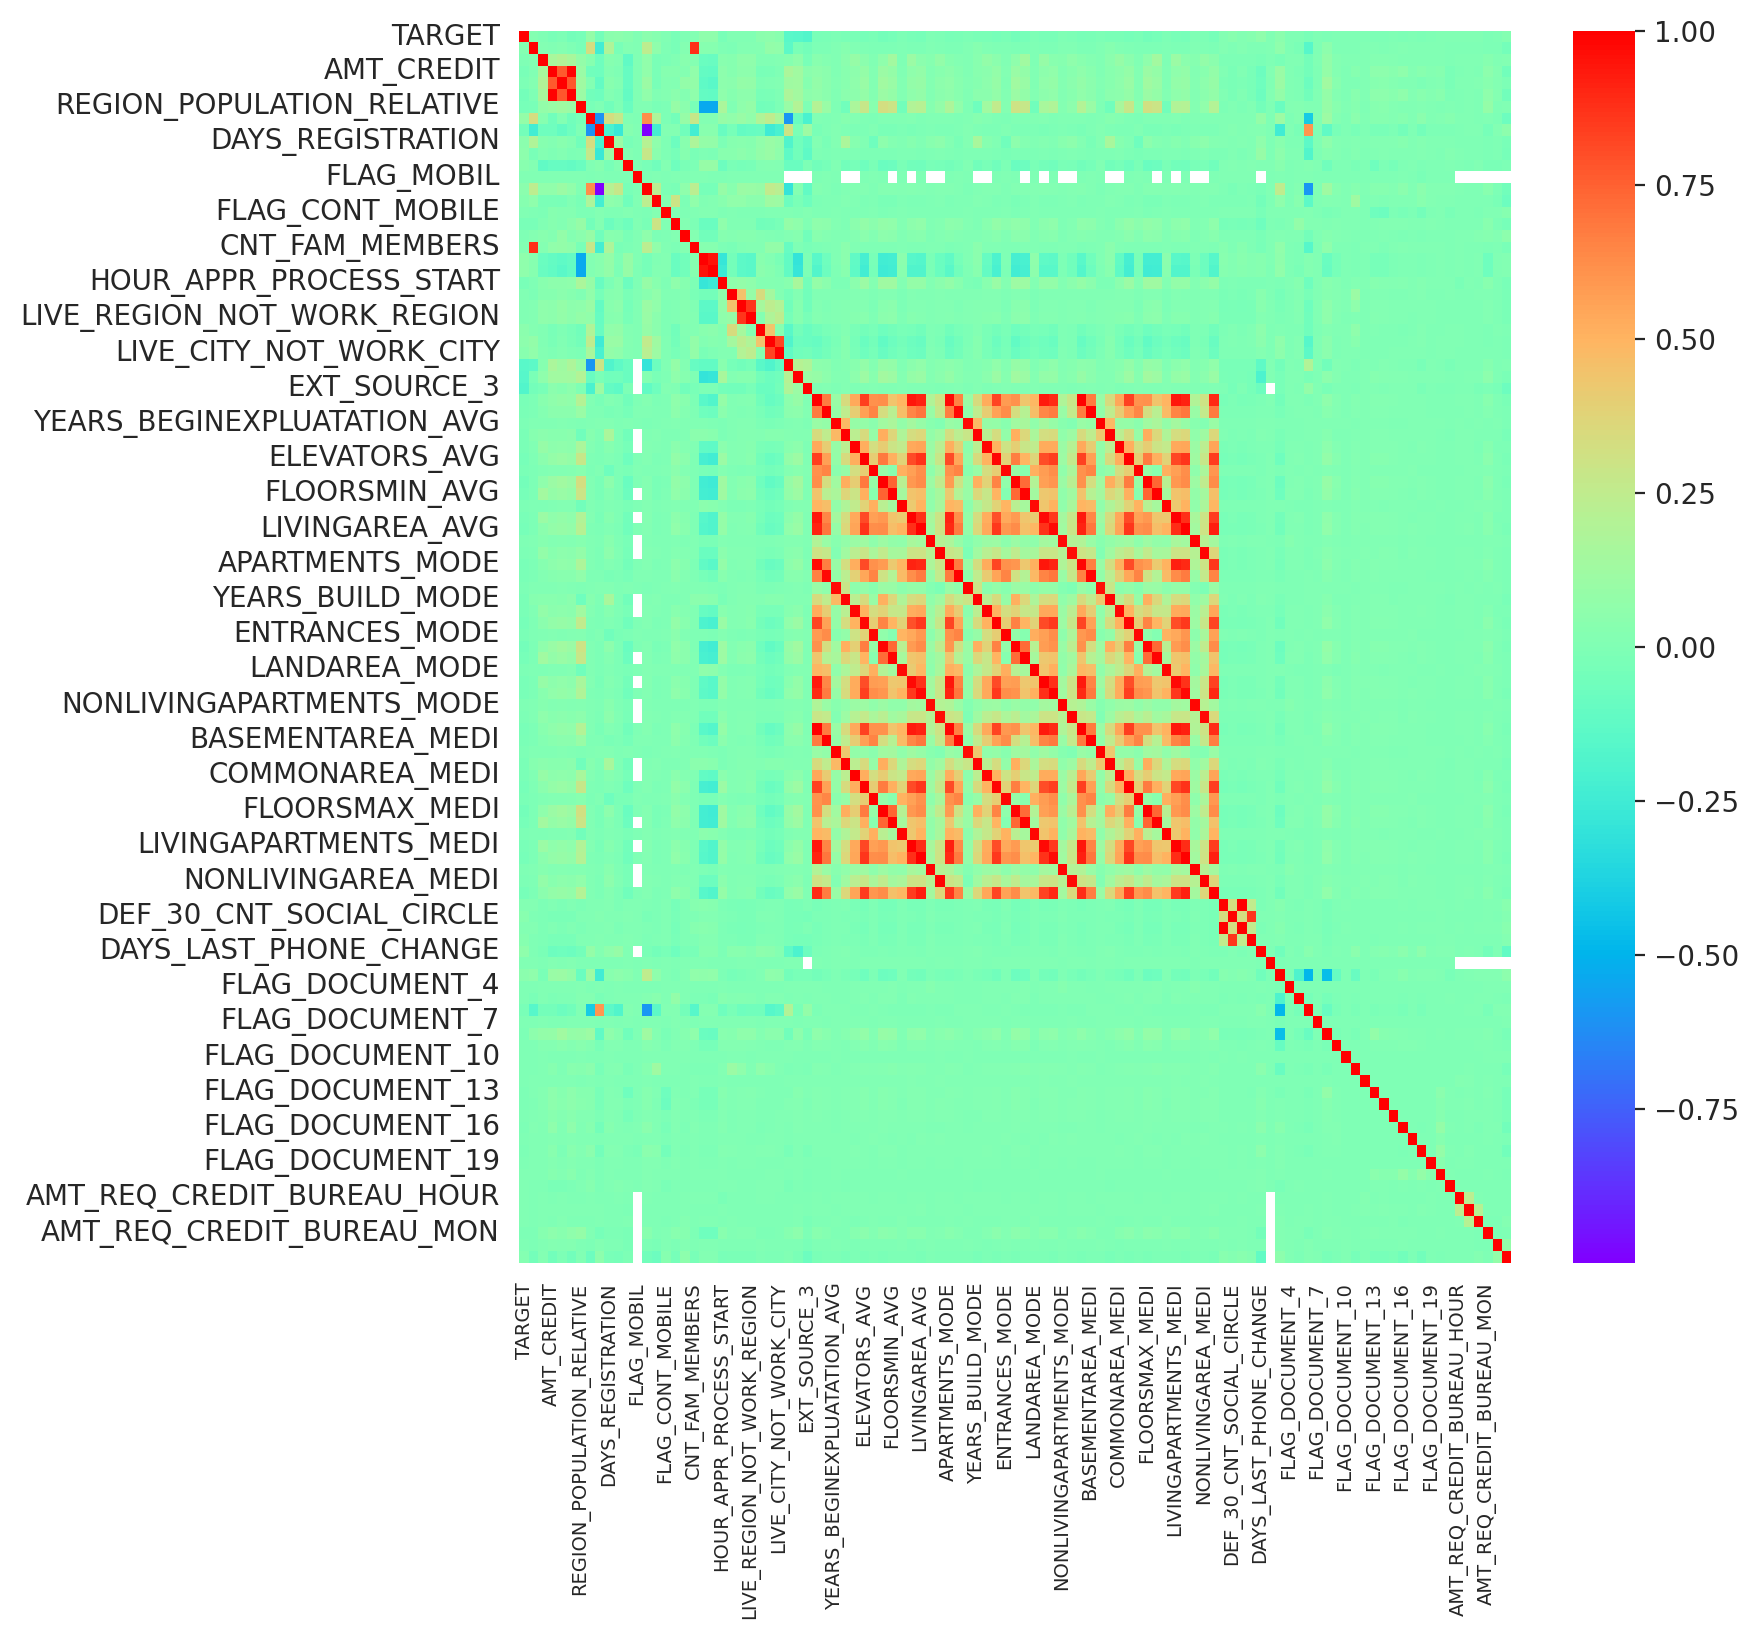

In [ ]:
corrmat = data.iloc[:,1:].corr() 
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.savefig(path+'Plots/heatMap.png')
plt.show()

Correlation Map

In [ ]:
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [ ]:
corrdf['Correlation'] = pd.DataFrame(corrdf['Correlation']).round(2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.head(10)

,Var1,Var2,Correlation
105,CNT_CHILDREN,TARGET,0.02
210,AMT_INCOME_TOTAL,TARGET,0.00
211,AMT_INCOME_TOTAL,CNT_CHILDREN,0.01
315,AMT_CREDIT,TARGET,0.03
316,AMT_CREDIT,CNT_CHILDREN,0.00
317,AMT_CREDIT,AMT_INCOME_TOTAL,0.16
420,AMT_ANNUITY,TARGET,0.01
421,AMT_ANNUITY,CNT_CHILDREN,0.02
422,AMT_ANNUITY,AMT_INCOME_TOTAL,0.19
423,AMT_ANNUITY,AMT_CREDIT,0.77


In [ ]:
np.unique(corrdf['Correlation'].values)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.72, 0.73, 0.74, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

Min-Max value of columns

In [ ]:
'''
We will analyse our columns using its min value and max value
'''
minMaxCount={}
for col in list(data.columns)[2:]:
    if data[col].dtype=='float64':
        c=[int(data[col].min()),int(data[col].max())]
        if c[0]==0 or c[1]==0:
            continue
        minMaxCount[col]=c

In [ ]:
minMaxCount=pd.DataFrame.from_dict(minMaxCount,orient='index',columns=['Min','Max'])
min(minMaxCount['Min']),max(minMaxCount['Max'])

(1, 117000000)

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

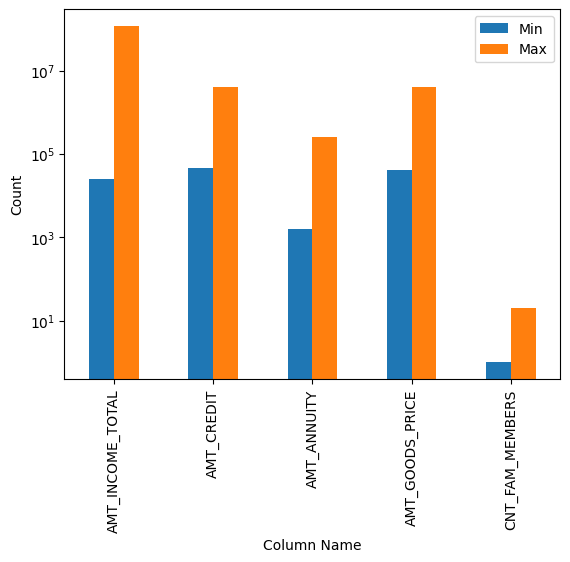

In [ ]:
ax=minMaxCount.plot(kind='bar',xlabel="Column Name",ylabel='Count')
plt.yscale('log')
plt.savefig(path+'Plots/minMaxColumns.png')
plt.show()

Plot pie chart for understanding target column

In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
tr_count=np.array(pd.DataFrame(data['TARGET']).value_counts())
tr_count

array([282686,  24825])

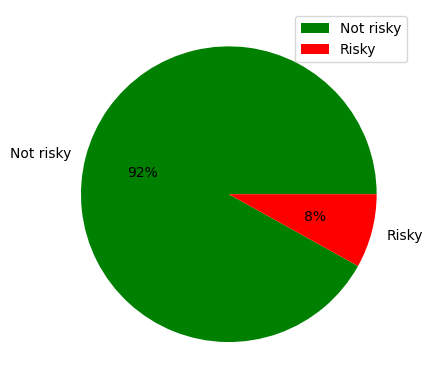

In [ ]:
plt.pie(tr_count, labels = ['Not risky','Risky'], colors = ['g','r'], autopct='%.0f%%')
plt.legend()
plt.savefig(path+'Plots/pieChartTarget.png')
plt.show()

#Preprocessing of data

Replacing value of columns 

In [ ]:
def replacingColumns(colName,data):
    uniqueVal = list(data[colName].unique())
    uniqueDict = dict()
    for i,val in enumerate(uniqueVal):
        uniqueDict[val] = i
    return data.replace({colName : uniqueDict})

In [ ]:
data = replacingColumns('NAME_CONTRACT_TYPE',data)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in data.columns:
    if data[col].dtype == 'O':
        data = replacingColumns(col,data)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Handling 'null' Value

In [ ]:
def handleNull(colName,data):
    '''
    Since only float64 data type have null value. That's why we use mean of that respective columns for filling
    '''
    data[colName] = data[colName].fillna(data[colName].mean())

In [ ]:
for col in data.columns:
    if sum(data[col].isna()) > 0:
        handleNull(col,data)

In [ ]:
'''
extract target columns separately from data : y
all independent columns : X
'''
X,y = data.iloc[:,2:],data.iloc[:,1]

Understanding more our data

In [ ]:
'''
As we see our min-max value of each column.
That's why we need to make column standarised only that column having data type float64
standarised all value
'''
X = pd.DataFrame(StandardScaler().fit_transform(X), columns = list(X.columns))
X.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.324395,-1.388135,-0.717914,-0.664531,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.375466,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01
1,-0.324395,0.720307,-0.717914,1.504820,-0.577538,0.426792,1.725450,0.592677,1.600698,0.838228,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
2,3.082659,-1.388135,1.392925,-0.664531,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.375466,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
3,-0.324395,0.720307,-0.717914,-0.664531,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.375466,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
4,-0.324395,-1.388135,-0.717914,-0.664531,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,-0.375466,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00


Split our data into X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
def splitData(X,y):
    return train_test_split(X,y, test_size= 0.2, random_state = 123)

Some miscellaneous task

In [ ]:
from sklearn.metrics import precision_score,accuracy_score, RocCurveDisplay, auc, roc_curve, recall_score, f1_score,roc_auc_score,log_loss,confusion_matrix

In [ ]:
def rocCurve(y_test,prob_vector,title):
    fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
    plt.title(title)
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def allScoreCalc(y_pred, y_test,addComment):
    '''
    precisionScore : precision of given model
    recallScore : recall of given model
    f1Score : f1 of given model
    '''
    precisionScore= precision_score(y_test, y_pred, average='macro')
    recallScore = recall_score(y_test, y_pred, average='macro')
    f1Score = f1_score(y_test, y_pred, average='macro')
    accuracyScore= accuracy_score(y_test, y_pred)
    # tn, fp, fn, tp = confusion_matrix(y_test, y_pred)
    print("precisionScore",addComment,":",precisionScore,"recallScore",addComment,":",recallScore,"f1Score",addComment,":",f1Score,"accuracyScore",addComment,":",accuracyScore)
    # print("true negative :", tn, "false positive :", fp,"false negative :", fn, "true positive :", tp)

#**All Models to train**

In [ ]:
X_train_data, X_test_data, y_train_data, y_test_data = splitData(X,y)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regression(X_train_Logistic, X_test_Logistic, y_train_Logistic, y_test_Logistic,selectedFeature):
    #Without Penalty
    clf_Logistic = LogisticRegression(random_state=0,penalty='none',max_iter= 1000).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic = clf_Logistic.predict(X_test_Logistic)
    y_proba_Logistics= clf_Logistic.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistics,"Logistic Regression Without Penalty at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_Logistic,y_test_Logistic,"Without Penalty at Feature Selection of "+ str(selectedFeature))
    print("f1score without :",f1_score(y_train_Logistic, clf_Logistic.predict(X_train_Logistic), average='macro'))
    #with L1 penalty
    clf_Logistic_L1 = LogisticRegression(random_state=0,penalty='l1',solver="liblinear",max_iter= 1000).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic_L1 = clf_Logistic_L1.predict(X_test_Logistic)
    y_proba_Logistic_L1 = clf_Logistic_L1.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistic_L1,"Logistic Regression With L1 Penalty at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_Logistic_L1,y_test_Logistic,"L1 Penalty at Feature Selection of "+ str(selectedFeature))
    print("f1score with L1 :",f1_score(y_train_Logistic, clf_Logistic_L1.predict(X_train_Logistic), average='macro'))
    #With L2 Penalty
    clf_Logistic_L2 = LogisticRegression(random_state=0,penalty='l2',max_iter= 1000).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic_L2 = clf_Logistic_L2.predict(X_test_Logistic)
    y_proba_Logistic_L2 = clf_Logistic_L2.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistic_L2,"Logistic Regression With L2 Penalty at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_Logistic_L2,y_test_Logistic,"L2 Penalty at Feature Selection of "+ str(selectedFeature))
    print("f1score with L2 :",f1_score(y_train_Logistic, clf_Logistic_L2.predict(X_train_Logistic), average='macro'))

Decision Tree Classifier

In [ ]:
!pip install graphviz
!pip install pydotplus
# !pip install sklearn.externals.six

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

In [ ]:
def decision_Tree(X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree,selectedFeature):
    clf_dtree = DecisionTreeClassifier(random_state=0).fit(X_train_dtree,y_train_dtree)
    y_pred_dtree = clf_dtree.predict(X_test_dtree)
    y_proba_dtree= clf_dtree.predict_proba(X_test_dtree)[::, 1]
    rocCurve(y_test_dtree,y_proba_dtree,"Decision Tree at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_dtree,y_test_dtree,"Desiciion at Feature Selection of "+ str(selectedFeature))

In [ ]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

Implement Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def Gaussian_NB(X_train_NB, X_test_NB, y_train_NB, y_test_NB,selectedFeature):
    clf_NB = GaussianNB().fit(X_train_NB,y_train_NB)
    y_pred_NB = clf_NB.predict(X_test_NB)
    y_proba_NB= clf_NB.predict_proba(X_test_NB)[::, 1]
    rocCurve(y_test_NB,y_proba_NB,"Gaussian NB at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_NB,y_test_NB,"Gaussian NB at Feature Selection of "+ str(selectedFeature))

Implement Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest(X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest,selectedFeature):
    clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_random_forest,y_train_random_forest)
    y_pred_random_forest = clf_random_forest.predict(X_test_random_forest)
    y_proba_random_forest= clf_random_forest.predict_proba(X_test_random_forest)[::, 1]
    rocCurve(y_test_random_forest,y_proba_random_forest,"Random Forest at Feature Selection of "+ str(selectedFeature))
    allScoreCalc(y_pred_random_forest,y_test_random_forest,"Random Forest at Feature Selection of "+ str(selectedFeature))

#PCA Implementation and train and test our data

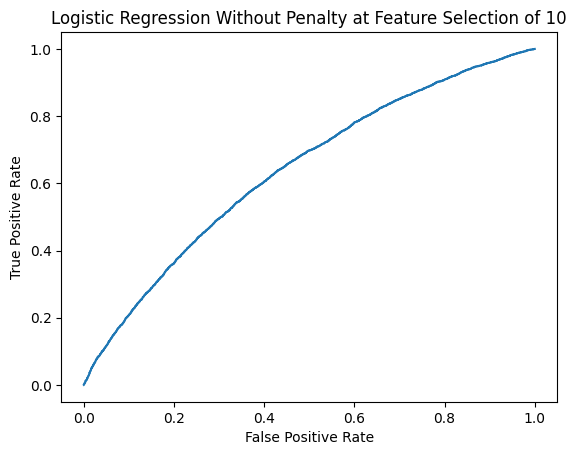

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Without Penalty at Feature Selection of 10 : 0.45922963107490694 recallScore Without Penalty at Feature Selection of 10 : 0.5 f1Score Without Penalty at Feature Selection of 10 : 0.47874837911366125 accuracyScore Without Penalty at Feature Selection of 10 : 0.9184592621498139
f1score without : 0.479022882010991


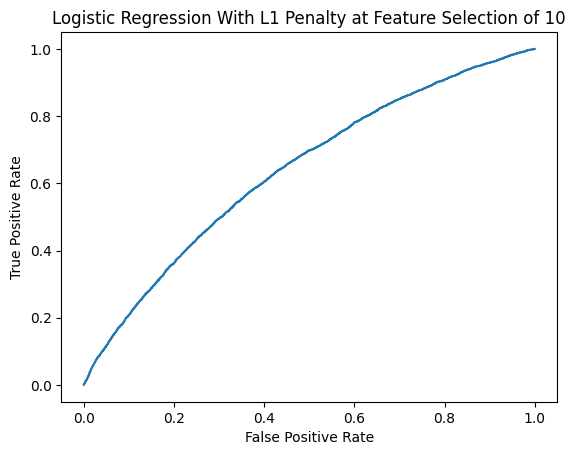

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore L1 Penalty at Feature Selection of 10 : 0.45922963107490694 recallScore L1 Penalty at Feature Selection of 10 : 0.5 f1Score L1 Penalty at Feature Selection of 10 : 0.47874837911366125 accuracyScore L1 Penalty at Feature Selection of 10 : 0.9184592621498139
f1score with L1 : 0.479022882010991


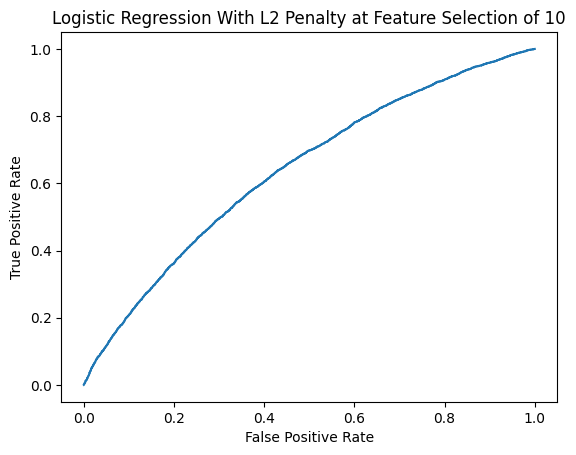

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore L2 Penalty at Feature Selection of 10 : 0.45922963107490694 recallScore L2 Penalty at Feature Selection of 10 : 0.5 f1Score L2 Penalty at Feature Selection of 10 : 0.47874837911366125 accuracyScore L2 Penalty at Feature Selection of 10 : 0.9184592621498139
f1score with L2 : 0.479022882010991


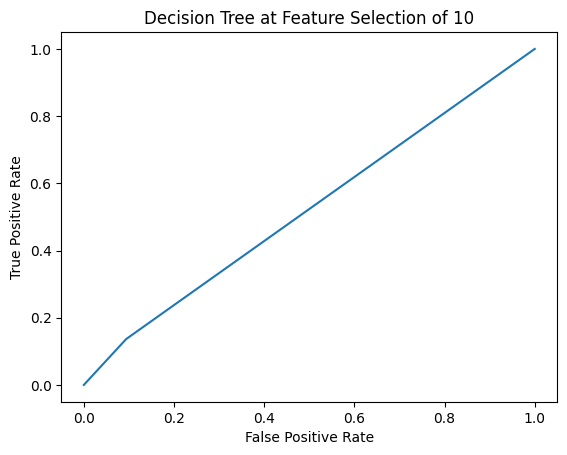

precisionScore Desiciion at Feature Selection of 10 : 0.5181275555528577 recallScore Desiciion at Feature Selection of 10 : 0.5212939816720353 f1Score Desiciion at Feature Selection of 10 : 0.5191789157903945 accuracyScore Desiciion at Feature Selection of 10 : 0.8432596783896721


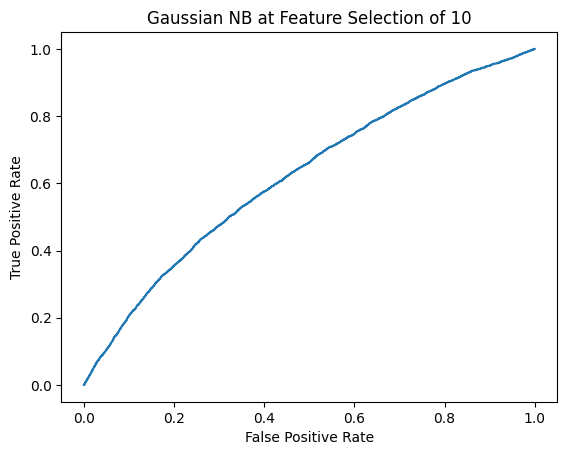

precisionScore Gaussian NB at Feature Selection of 10 : 0.5217834672621473 recallScore Gaussian NB at Feature Selection of 10 : 0.5007170758648851 f1Score Gaussian NB at Feature Selection of 10 : 0.4819144380342542 accuracyScore Gaussian NB at Feature Selection of 10 : 0.9166056940311855


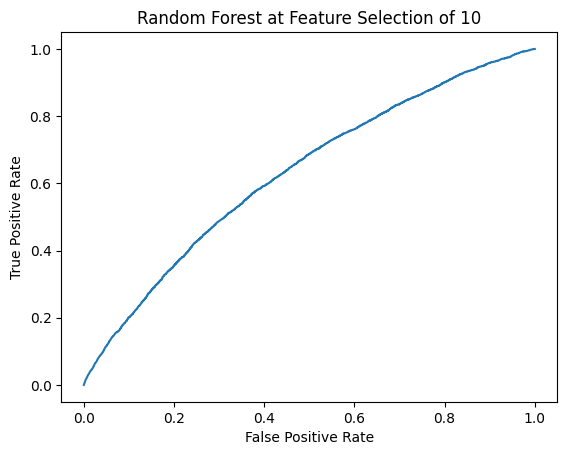

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Random Forest at Feature Selection of 10 : 0.45922963107490694 recallScore Random Forest at Feature Selection of 10 : 0.5 f1Score Random Forest at Feature Selection of 10 : 0.47874837911366125 accuracyScore Random Forest at Feature Selection of 10 : 0.9184592621498139


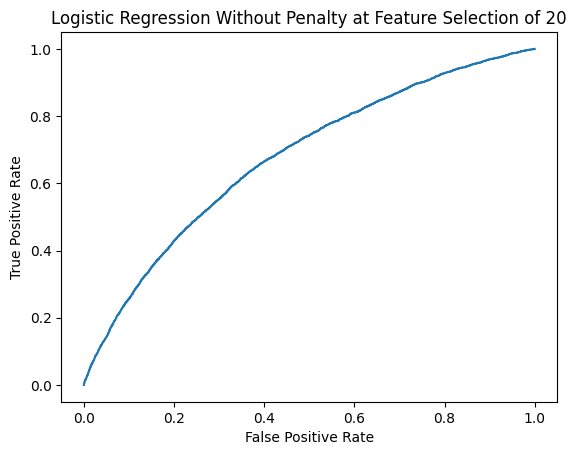

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Without Penalty at Feature Selection of 20 : 0.45922963107490694 recallScore Without Penalty at Feature Selection of 20 : 0.5 f1Score Without Penalty at Feature Selection of 20 : 0.47874837911366125 accuracyScore Without Penalty at Feature Selection of 20 : 0.9184592621498139
f1score without : 0.4793798340914054


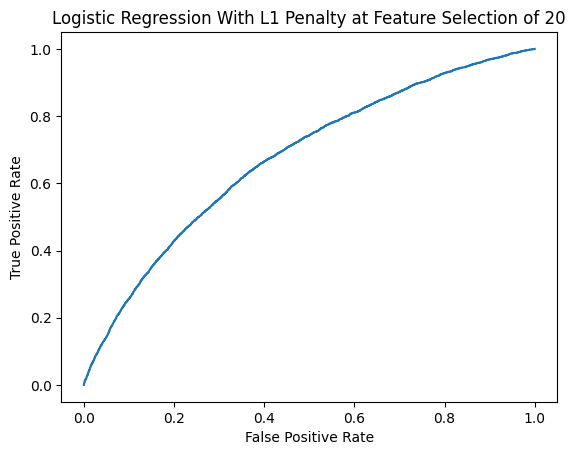

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore L1 Penalty at Feature Selection of 20 : 0.45922963107490694 recallScore L1 Penalty at Feature Selection of 20 : 0.5 f1Score L1 Penalty at Feature Selection of 20 : 0.47874837911366125 accuracyScore L1 Penalty at Feature Selection of 20 : 0.9184592621498139
f1score with L1 : 0.4793798340914054


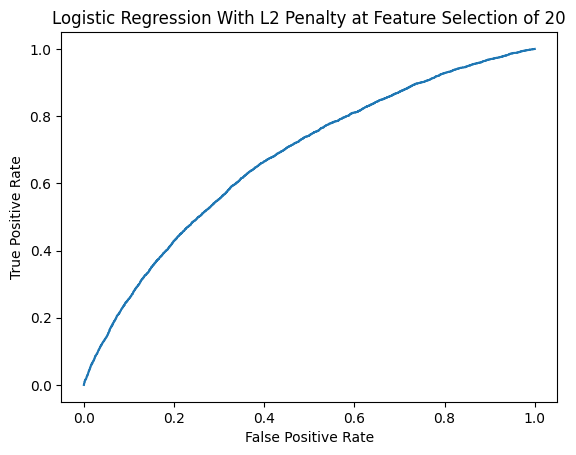

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore L2 Penalty at Feature Selection of 20 : 0.45922963107490694 recallScore L2 Penalty at Feature Selection of 20 : 0.5 f1Score L2 Penalty at Feature Selection of 20 : 0.47874837911366125 accuracyScore L2 Penalty at Feature Selection of 20 : 0.9184592621498139
f1score with L2 : 0.4793798340914054


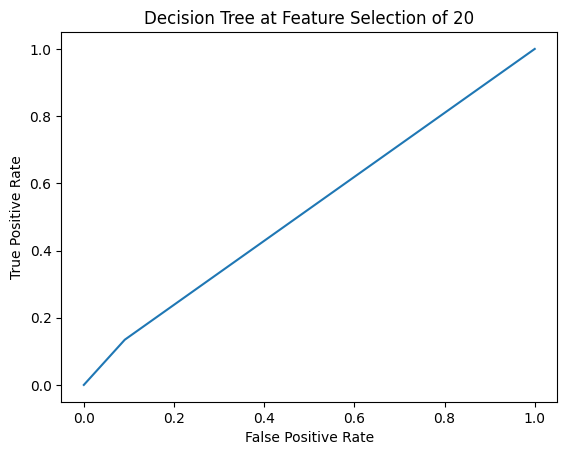

precisionScore Desiciion at Feature Selection of 20 : 0.5191258968169891 recallScore Desiciion at Feature Selection of 20 : 0.5218459742568076 f1Score Desiciion at Feature Selection of 20 : 0.520124799140485 accuracyScore Desiciion at Feature Selection of 20 : 0.8459424743508447


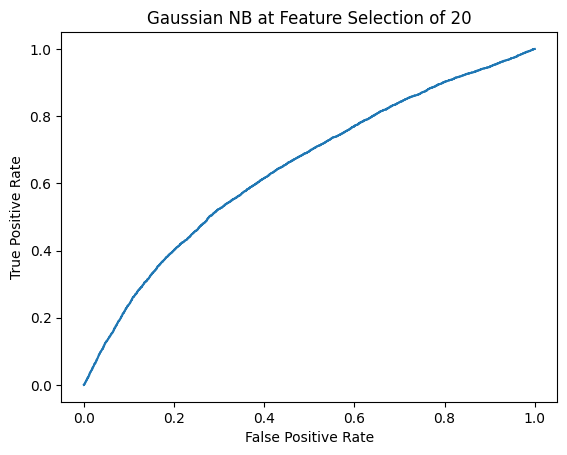

precisionScore Gaussian NB at Feature Selection of 20 : 0.5498784244600761 recallScore Gaussian NB at Feature Selection of 20 : 0.5085503862297825 f1Score Gaussian NB at Feature Selection of 20 : 0.5011823801863884 accuracyScore Gaussian NB at Feature Selection of 20 : 0.9101344649854478


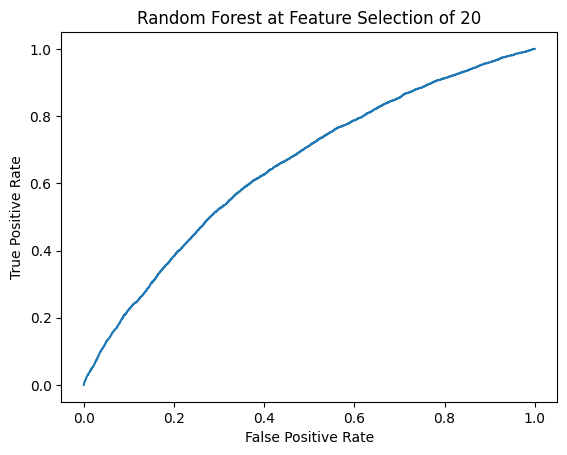

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Random Forest at Feature Selection of 20 : 0.45922963107490694 recallScore Random Forest at Feature Selection of 20 : 0.5 f1Score Random Forest at Feature Selection of 20 : 0.47874837911366125 accuracyScore Random Forest at Feature Selection of 20 : 0.9184592621498139


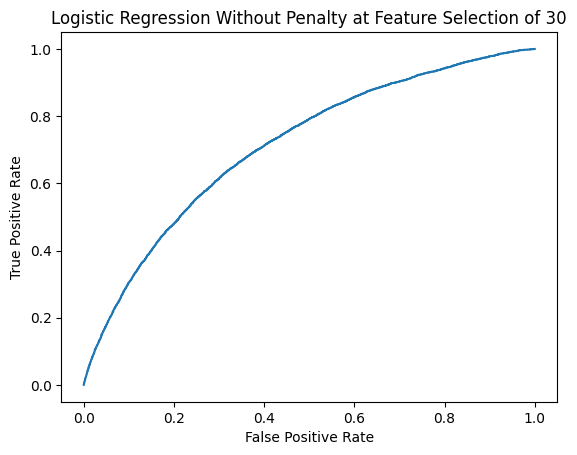

precisionScore Without Penalty at Feature Selection of 30 : 0.6592943817300498 recallScore Without Penalty at Feature Selection of 30 : 0.5008642374109791 f1Score Without Penalty at Feature Selection of 30 : 0.48070680979103747 accuracyScore Without Penalty at Feature Selection of 30 : 0.9183779653025056
f1score without : 0.48070404056458743


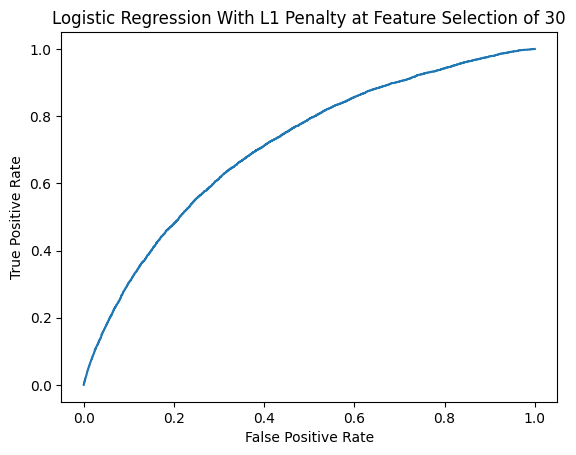

precisionScore L1 Penalty at Feature Selection of 30 : 0.6592943817300498 recallScore L1 Penalty at Feature Selection of 30 : 0.5008642374109791 f1Score L1 Penalty at Feature Selection of 30 : 0.48070680979103747 accuracyScore L1 Penalty at Feature Selection of 30 : 0.9183779653025056
f1score with L1 : 0.48070404056458743


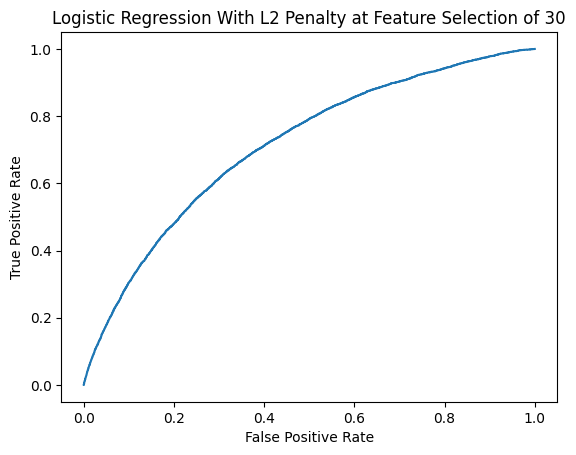

precisionScore L2 Penalty at Feature Selection of 30 : 0.6592943817300498 recallScore L2 Penalty at Feature Selection of 30 : 0.5008642374109791 f1Score L2 Penalty at Feature Selection of 30 : 0.48070680979103747 accuracyScore L2 Penalty at Feature Selection of 30 : 0.9183779653025056
f1score with L2 : 0.48070404056458743


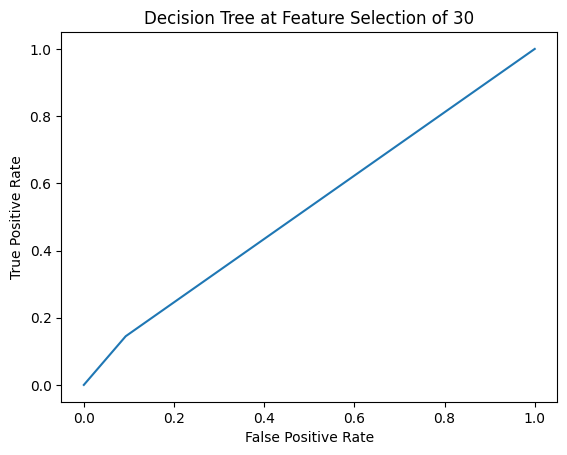

precisionScore Desiciion at Feature Selection of 30 : 0.5222147934038096 recallScore Desiciion at Feature Selection of 30 : 0.5260213570448546 f1Score Desiciion at Feature Selection of 30 : 0.5235748362577665 accuracyScore Desiciion at Feature Selection of 30 : 0.8449343934442223


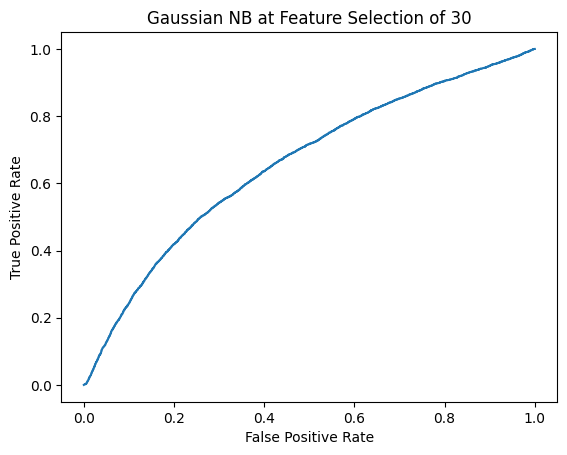

precisionScore Gaussian NB at Feature Selection of 30 : 0.5537555882059567 recallScore Gaussian NB at Feature Selection of 30 : 0.5358102808837332 f1Score Gaussian NB at Feature Selection of 30 : 0.5411769734149077 accuracyScore Gaussian NB at Feature Selection of 30 : 0.885111295383965


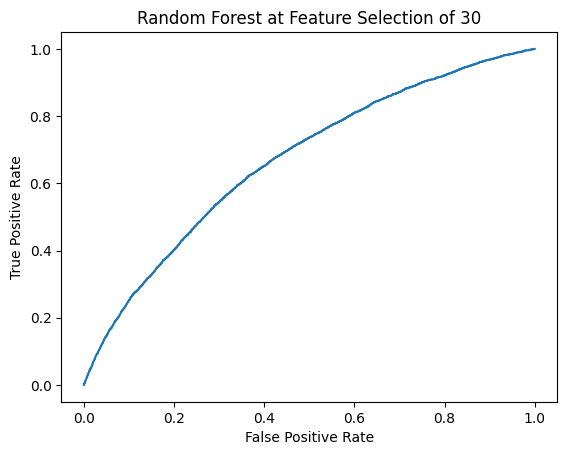

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Random Forest at Feature Selection of 30 : 0.45922963107490694 recallScore Random Forest at Feature Selection of 30 : 0.5 f1Score Random Forest at Feature Selection of 30 : 0.47874837911366125 accuracyScore Random Forest at Feature Selection of 30 : 0.9184592621498139


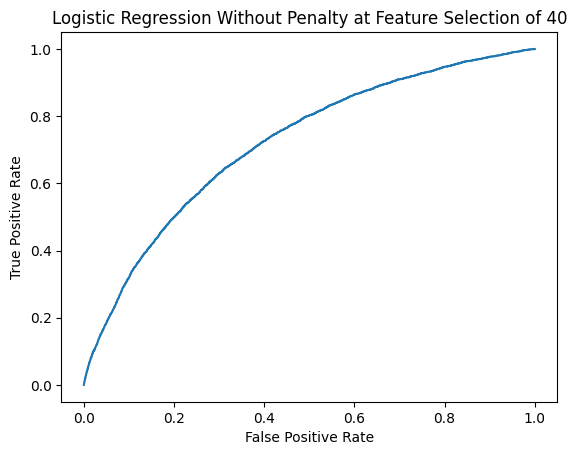

precisionScore Without Penalty at Feature Selection of 40 : 0.6295413913154265 recallScore Without Penalty at Feature Selection of 40 : 0.5013208197952523 f1Score Without Penalty at Feature Selection of 40 : 0.48183712697141357 accuracyScore Without Penalty at Feature Selection of 40 : 0.918215371607889
f1score without : 0.48228329047064555


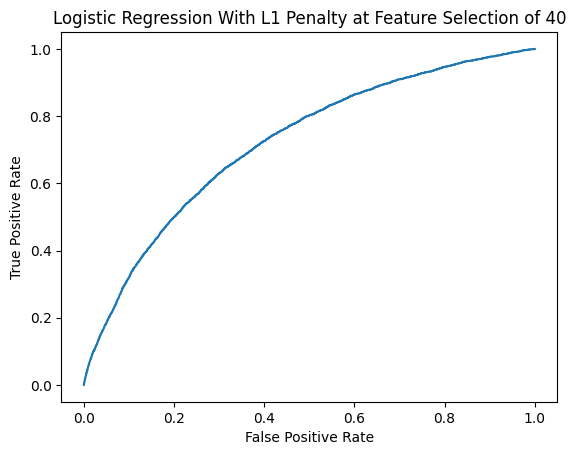

precisionScore L1 Penalty at Feature Selection of 40 : 0.6332423306221175 recallScore L1 Penalty at Feature Selection of 40 : 0.5013296712327259 f1Score L1 Penalty at Feature Selection of 40 : 0.48184217157068104 accuracyScore L1 Penalty at Feature Selection of 40 : 0.9182316309773507
f1score with L1 : 0.48228455962255123


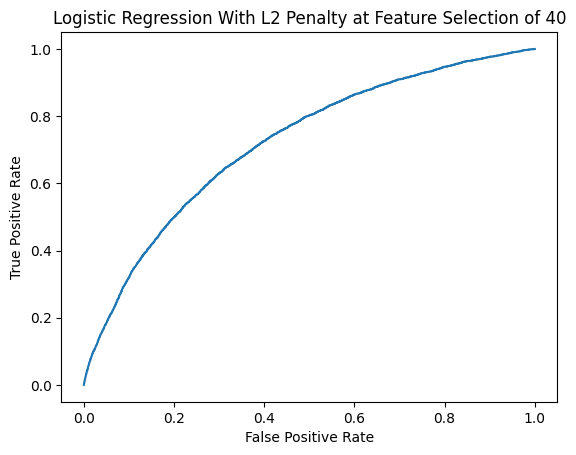

precisionScore L2 Penalty at Feature Selection of 40 : 0.6295413913154265 recallScore L2 Penalty at Feature Selection of 40 : 0.5013208197952523 f1Score L2 Penalty at Feature Selection of 40 : 0.48183712697141357 accuracyScore L2 Penalty at Feature Selection of 40 : 0.918215371607889
f1score with L2 : 0.48228455962255123


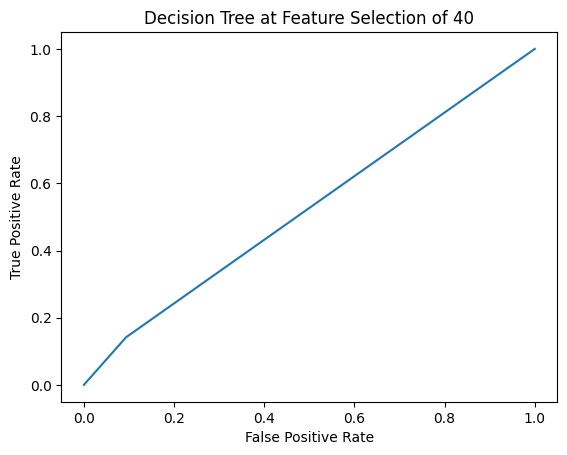

precisionScore Desiciion at Feature Selection of 40 : 0.5204561804383674 recallScore Desiciion at Feature Selection of 40 : 0.5240543823140408 f1Score Desiciion at Feature Selection of 40 : 0.5216975963823869 accuracyScore Desiciion at Feature Selection of 40 : 0.8439913500154465


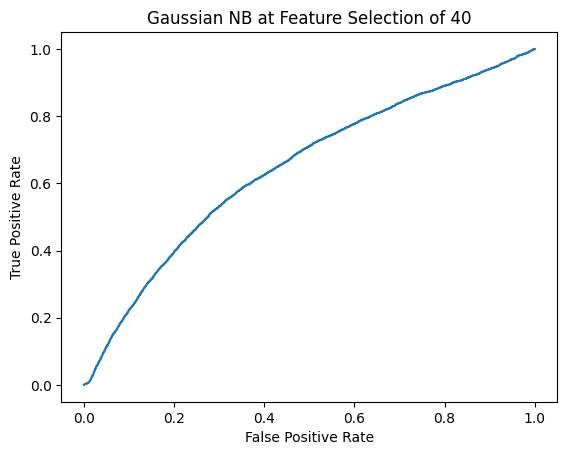

precisionScore Gaussian NB at Feature Selection of 40 : 0.5468599011314419 recallScore Gaussian NB at Feature Selection of 40 : 0.5522745670367456 f1Score Gaussian NB at Feature Selection of 40 : 0.5492293211700793 accuracyScore Gaussian NB at Feature Selection of 40 : 0.8571126611709998


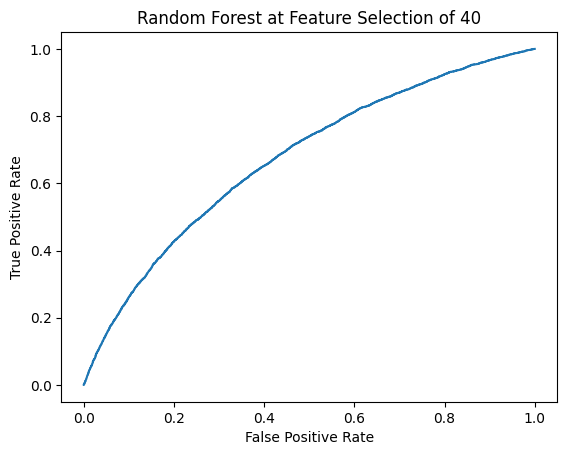

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precisionScore Random Forest at Feature Selection of 40 : 0.45922963107490694 recallScore Random Forest at Feature Selection of 40 : 0.5 f1Score Random Forest at Feature Selection of 40 : 0.47874837911366125 accuracyScore Random Forest at Feature Selection of 40 : 0.9184592621498139


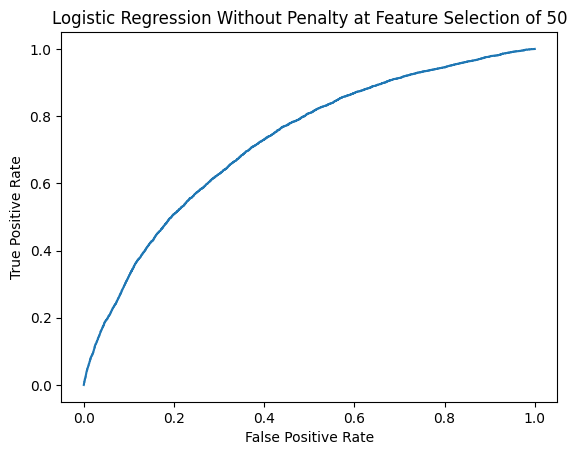

precisionScore Without Penalty at Feature Selection of 50 : 0.6775702441680179 recallScore Without Penalty at Feature Selection of 50 : 0.502118426973717 f1Score Without Penalty at Feature Selection of 50 : 0.48344251901944213 accuracyScore Without Penalty at Feature Selection of 50 : 0.9183454465635823
f1score without : 0.48340203562357387


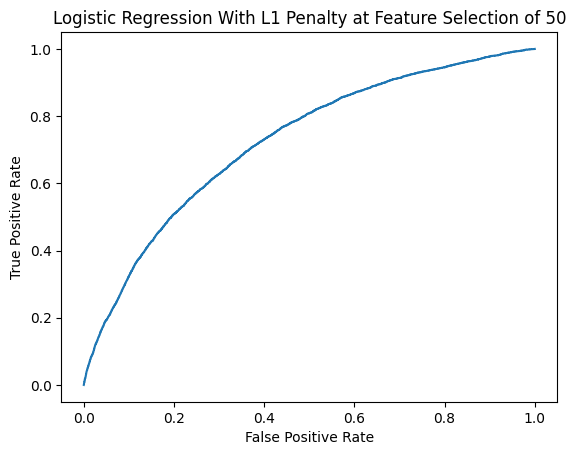

precisionScore L1 Penalty at Feature Selection of 50 : 0.6775702441680179 recallScore L1 Penalty at Feature Selection of 50 : 0.502118426973717 f1Score L1 Penalty at Feature Selection of 50 : 0.48344251901944213 accuracyScore L1 Penalty at Feature Selection of 50 : 0.9183454465635823
f1score with L1 : 0.48335123586042233


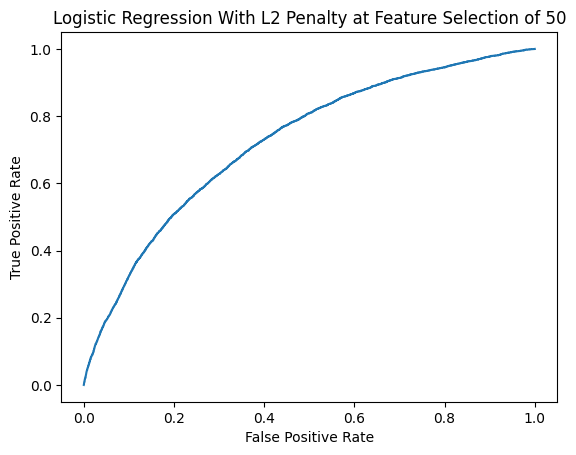

precisionScore L2 Penalty at Feature Selection of 50 : 0.6826101878738704 recallScore L2 Penalty at Feature Selection of 50 : 0.502218127871025 f1Score L2 Penalty at Feature Selection of 50 : 0.4836428443829006 accuracyScore L2 Penalty at Feature Selection of 50 : 0.9183617059330439
f1score with L2 : 0.48335123586042233


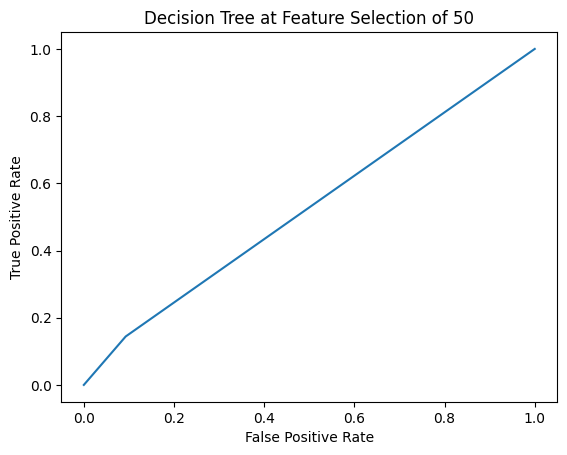

precisionScore Desiciion at Feature Selection of 50 : 0.5219416057981822 recallScore Desiciion at Feature Selection of 50 : 0.5256668106429896 f1Score Desiciion at Feature Selection of 50 : 0.5232726946549021 accuracyScore Desiciion at Feature Selection of 50 : 0.8449506528136839


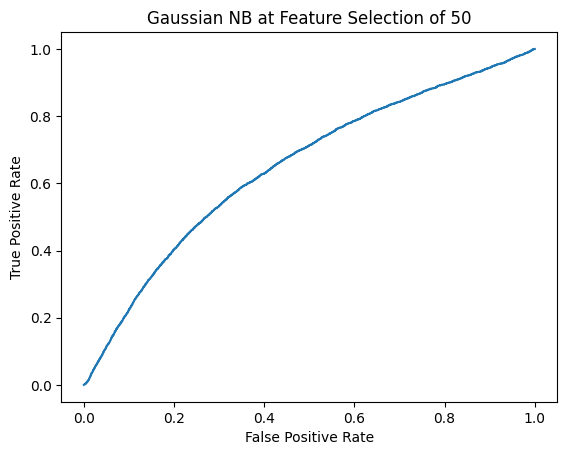

precisionScore Gaussian NB at Feature Selection of 50 : 0.5474170946360457 recallScore Gaussian NB at Feature Selection of 50 : 0.5845999355001135 f1Score Gaussian NB at Feature Selection of 50 : 0.552848021257319 accuracyScore Gaussian NB at Feature Selection of 50 : 0.8108547550525991


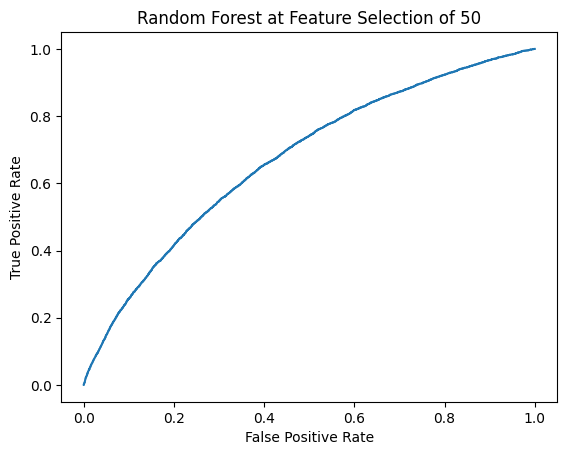

precisionScore Random Forest at Feature Selection of 50 : 0.45922963107490694 recallScore Random Forest at Feature Selection of 50 : 0.5 f1Score Random Forest at Feature Selection of 50 : 0.47874837911366125 accuracyScore Random Forest at Feature Selection of 50 : 0.9184592621498139


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for comp in range(10,51,10):
    pca = PCA(n_components=comp)
    pca.fit(X_train_data)
    X_train_pca = pca.transform(X_train_data)
    X_test_pca = pca.transform(X_test_data)
    logistic_regression(X_train_pca, X_test_pca, y_train_data, y_test_data,comp)
    decision_Tree(X_train_pca, X_test_pca, y_train_data, y_test_data,comp)
    Gaussian_NB(X_train_pca, X_test_pca, y_train_data, y_test_data,comp)
    random_forest(X_train_pca, X_test_pca, y_train_data, y_test_data,comp)